In [1]:
import import_ipynb
import clean_data
import feature_selection as fs
import pandas as pd
import modeling_2 as model
import numpy as np

In [3]:
df = clean_data.runAll()

/Users/williamegan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
df.head()

,ADM_RATE,AGEGE24,AGE_ENTRY,AVGFACSAL,COSTT4_A,COSTT4_P,D150_4_AIANOLD,D150_4_HISPOLD,D150_L4_AIANOLD,D150_L4_HISPOLD,...,OPEFLAG_0.0,OPEFLAG_1.0,OPEFLAG_2.0,OPEFLAG_3.0,OPEFLAG_5.0,OPEFLAG_7.0,OPEFLAG_8.0,Year,MD_EARN_WNE_P6,UNITID
0,-1.686152,-2.467388,-1.123197,-0.580916,0.038178,0.040647,-0.502342,-0.590263,-0.003411,-0.011883,...,1,0,0,0,0,0,0,2003,28400.000000,100654
1,0.903349,-1.216280,-0.640738,0.389326,0.038178,0.040647,0.222784,-0.536211,-0.003411,-0.011883,...,1,0,0,0,0,0,0,2003,34300.000000,100663
2,0.017765,4.234976,2.393439,-1.665272,0.038178,0.040647,-0.006448,-0.012273,-0.003411,-0.011883,...,1,0,0,0,0,0,0,2003,29471.207226,100690
3,1.413031,-1.126915,-0.496052,0.123803,0.038178,0.040647,-0.018925,-0.557832,-0.003411,-0.011883,...,1,0,0,0,0,0,0,2003,37400.000000,100706
4,-1.264421,-2.646118,-1.182215,-0.566444,0.038178,0.040647,-0.623197,-0.601073,-0.003411,-0.011883,...,1,0,0,0,0,0,0,2003,24000.000000,100724


In [6]:
target = 'MD_EARN_WNE_P6'
df_no_id = df.drop('UNITID', axis=1)
n_features_to_select = 20
sel = fs.F_REGRESSION

In [8]:
selected_df = fs.selectFeatures(df_no_id, target, n_features_to_select, sel)

/Users/williamegan/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/williamegan/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/williamegan/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/williamegan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/williamegan/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/williamegan/anaconda3/lib/python3.7/sit

In [9]:
train, test = model.sampling_data(selected_df)

x_train, y_train, x_test, y_test = model.split_data(train, test, target)

rf_feature_importance, rf, preds = model.run_model(x_train, y_train, x_test, 14, model.RF)

/Users/williamegan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


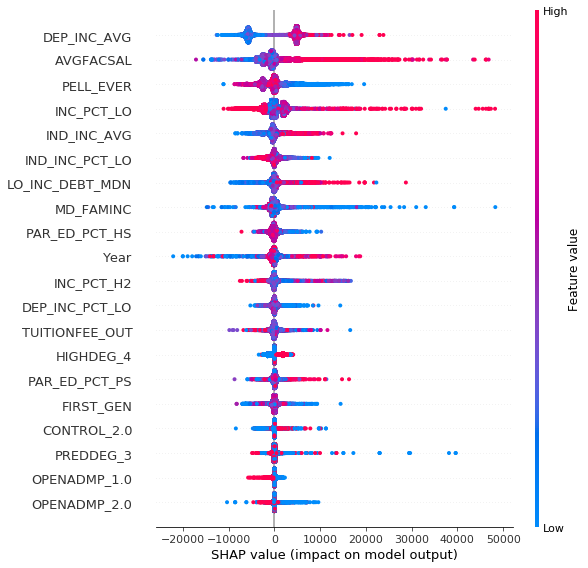

In [10]:
model.shap_summary_plot_for_Trees(rf, x_train)